In [21]:
import matplotlib.pyplot as plt
import pandas as pd
data_home = 'https://github.com/dknife/ML/raw/main/data/'
lin_data = pd.read_csv(data_home+'pollution.csv')
print(lin_data)

       input  pollution
0   0.240557   4.858750
1   0.159731   4.471091
2   0.108295   4.341897
3   0.233770   3.586844
4   0.283235   3.678243
..       ...        ...
95  0.070824   4.851617
96  0.055300   4.912696
97  0.138229   5.516441
98  0.007205   5.661260
99  0.290294   3.169049

[100 rows x 2 columns]


<Axes: xlabel='input', ylabel='pollution'>

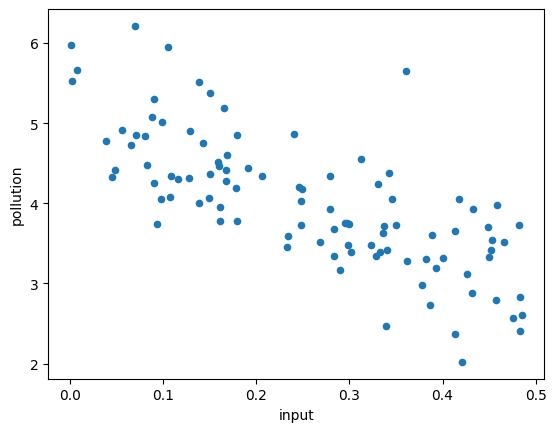

In [22]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')

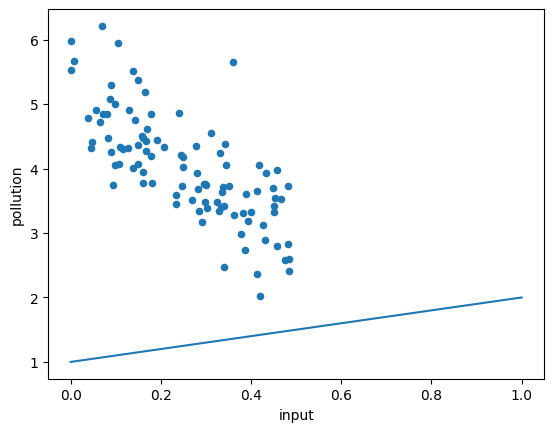

In [23]:
w, b = 1,1
x0, x1 = 0.0, 1.0
def h(x, w, b):
  return w*x+b

lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0,x1], [h(x0, w, b), h(x1, w, b)])

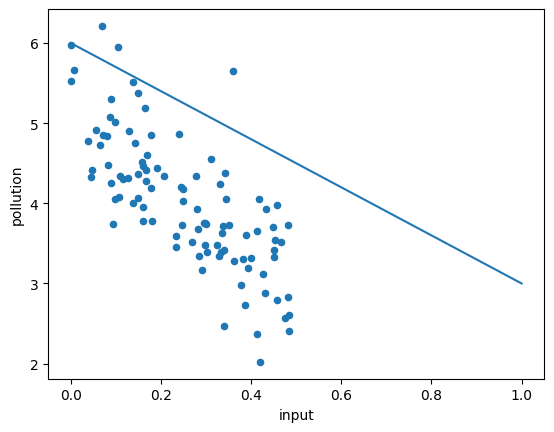

In [24]:
w,b=-3,6
x0,x1 = 0.0,1.0

lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0,x1], [h(x0, w, b), h(x1, w, b)])

In [25]:
import numpy as np
y_hat = np.array([1.2, 2.1, 2.9, 4.1, 4.7, 6.3, 7.1, 7.7,8.5,10.1])
y = np.array([1,2,3,4,5,6,7,8,9,10])
diff_square = (y_hat - y)**2
e_mse = diff_square.sum() / len(y)
e_mse

0.06099999999999996

In [26]:
from sklearn.metrics import mean_squared_error
print('Mean squared error:', mean_squared_error(y_hat, y))

Mean squared error: 0.06099999999999996


In [27]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error:', mean_absolute_error(y_hat, y))

Mean absolute error: 0.20999999999999988


In [28]:
from sklearn.metrics import mean_squared_error as mse
x = np.array([1, 4.5, 9, 10, 13])
y = np.array([0, 0.2, 2.5, 5.4, 7.3])

w_list = np.arange(1.0, 0.2, -0.1)
for w in list(w_list):
    y_hat = w*x
    print('w = {:.1f}, 평균제곱 오차: {:.2f}'.format(w, mse(y_hat, y)))

w = 1.0, 평균제곱 오차: 23.08
w = 0.9, 평균제곱 오차: 15.86
w = 0.8, 평균제곱 오차: 10.13
w = 0.7, 평균제곱 오차: 5.89
w = 0.6, 평균제곱 오차: 3.13
w = 0.5, 평균제곱 오차: 1.85
w = 0.4, 평균제곱 오차: 2.06
w = 0.3, 평균제곱 오차: 3.75


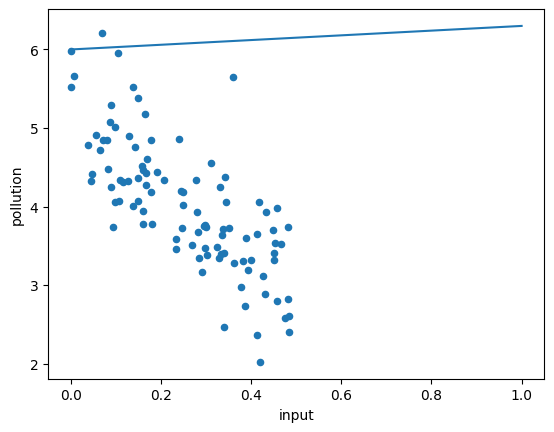

In [29]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
plt.plot([x0, x1], [h(x0, w, b), h(x1, w, b)])

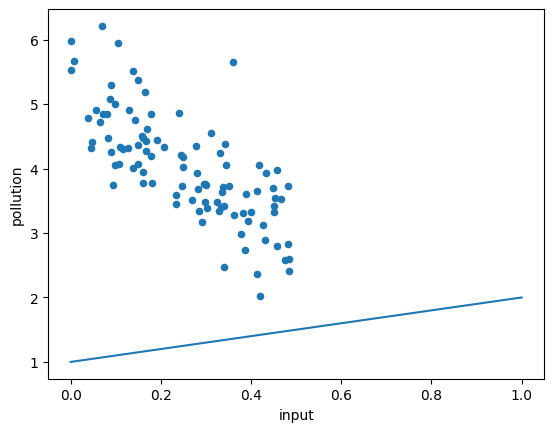

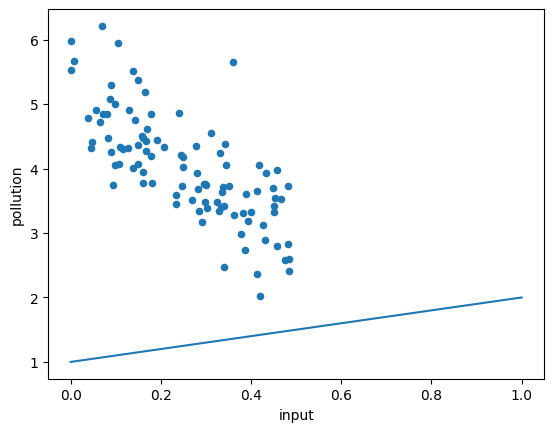

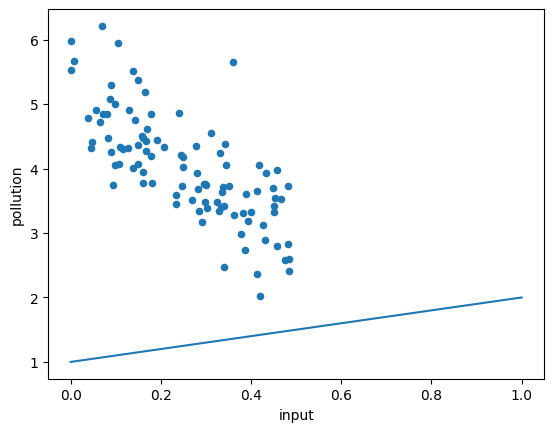

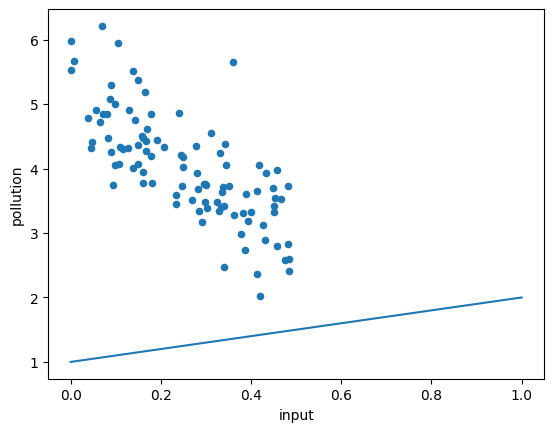

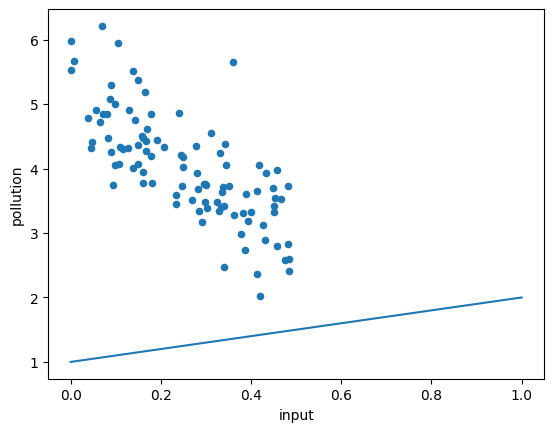

In [30]:
def h(x, param):
    return param[0]*x+param[1]
learning_iteration = 1000
learning_rate = 0.005
param = [1,1]

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()

for i in range(learning_iteration):
    if i % 200 == 0:
        lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
        plt.plot([0, 1], [h(0, param), h(1, param)])

error = (h(x, param) -y)
w = w - learning_rate * (error * x).sum()
b = b - learning_rate * error.sum()

# Scikit-Learn 사용

In [31]:
from sklearn import linear_model

x = lin_data['input'].to_numpy()
y = lin_data['pollution'].to_numpy()
x = x[:, np.newaxis]
print(x)

[[0.24055707]
 [0.1597306 ]
 [0.10829455]
 [0.23377033]
 [0.28323537]
 [0.12808583]
 [0.34549075]
 [0.33271329]
 [0.09001426]
 [0.11620483]
 [0.20601359]
 [0.15000132]
 [0.39294774]
 [0.4209191 ]
 [0.33071579]
 [0.48175618]
 [0.26858081]
 [0.2328081 ]
 [0.45704999]
 [0.24569785]
 [0.38236759]
 [0.29856761]
 [0.29944705]
 [0.44841195]
 [0.09896587]
 [0.04793845]
 [0.15920226]
 [0.41791947]
 [0.16082931]
 [0.24851334]
 [0.47514699]
 [0.29708178]
 [0.1653657 ]
 [0.10529827]
 [0.0932346 ]
 [0.15023707]
 [0.48271145]
 [0.28364396]
 [0.07020281]
 [0.17768318]
 [0.46604517]
 [0.45860857]
 [0.27905958]
 [0.16777949]
 [0.32352937]
 [0.4329887 ]
 [0.32825247]
 [0.03894147]
 [0.33719318]
 [0.36048117]
 [0.08236935]
 [0.36232547]
 [0.33608776]
 [0.13852276]
 [0.41330502]
 [0.14950648]
 [0.24760616]
 [0.10715455]
 [0.00153907]
 [0.45324442]
 [0.16725705]
 [0.16088719]
 [0.00066376]
 [0.48323703]
 [0.0902836 ]
 [0.3775714 ]
 [0.3501837 ]
 [0.33927998]
 [0.45179427]
 [0.17890406]
 [0.16829187]
 [0.24

In [32]:
regr = linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

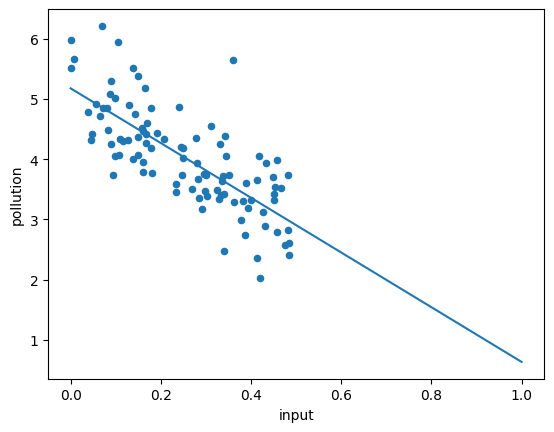

In [33]:
lin_data.plot(kind = 'scatter', x = 'input', y = 'pollution')
y_pred = regr.predict([[0], [1]])
plt.plot([0, 1], y_pred)